In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
import seaborn as sns
from skimage import exposure
from skimage.filters import median
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/kaggle/input/diabetic-retinopathy-resized/trainLabels.csv')

In [3]:
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:
os.chdir('/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train')

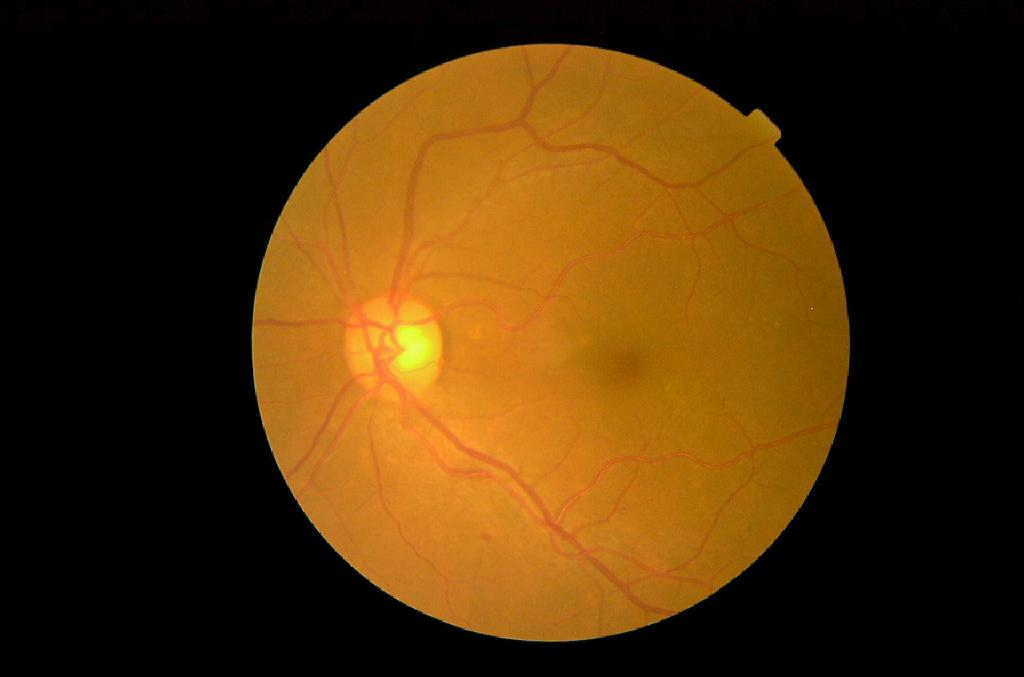

In [5]:
img=Image.open('1050_left.jpeg')
img

In [6]:
img=np.array(img)
img.shape

(677, 1024, 3)

In [7]:
folder_path = '/kaggle/input/diabetic-retinopathy-resized/resized_train/resized_train'

output_folder = '/kaggle/working/'

target_size = (224, 224) 
files = os.listdir(folder_path)

for file_name in files:
    if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Read the image
        image_path = os.path.join(folder_path, file_name)
        img = cv2.imread(image_path)

        # Resize the image
        resized_img = cv2.resize(img, target_size)

        # Save the resized image
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, resized_img)

print("Done !.")

Done !.


In [8]:
os.chdir('/kaggle/working/')

In [9]:
images=[]
labels=[]
len(data)

35126

In [10]:
for img_path, label in zip(data['image'], data['level']):
        with Image.open(os.path.join(output_folder, img_path+'.jpeg')) as img:
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)

In [11]:
images=np.array(images)
labels=np.array(labels)
len(images),len(labels)

(35126, 35126)

<Axes: ylabel='count'>

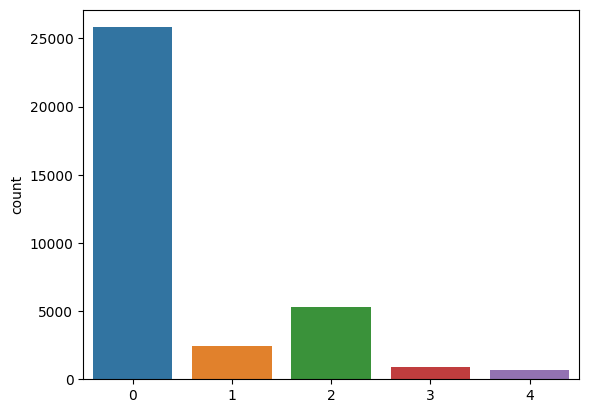

In [12]:
sns.countplot(x=labels)

In [13]:
threshold = 1000  # Adjust this threshold as needed

# Calculate the counts of each class
unique_labels, label_counts = np.unique(labels, return_counts=True)
# Find classes with counts above the threshold
classes_above_threshold = unique_labels[label_counts > threshold]

# Initialize lists to store filtered images and labels
filtered_images = []
filtered_labels = []

In [14]:
for label in unique_labels:
    # Find indices of images with the current label
    label_indices = np.where(labels == label)[0]
    # Shuffle the indices to randomly select samples
    np.random.shuffle(label_indices)
    # Keep only the first 'threshold' indices
    label_indices = label_indices[:threshold]
    # Append the images and labels at these indices to the filtered lists
    filtered_images.extend(images[label_indices])
    filtered_labels.extend(labels[label_indices])
# Convert the filtered lists back to numpy arrays


In [15]:
print("Number of images before filtering:", len(images))
print("Number of labels before filtering:", len(labels))
print("Number of images after filtering:", len(filtered_images))
print("Number of labels after filtering:", len(filtered_labels))

Number of images before filtering: 35126
Number of labels before filtering: 35126
Number of images after filtering: 4581
Number of labels after filtering: 4581


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

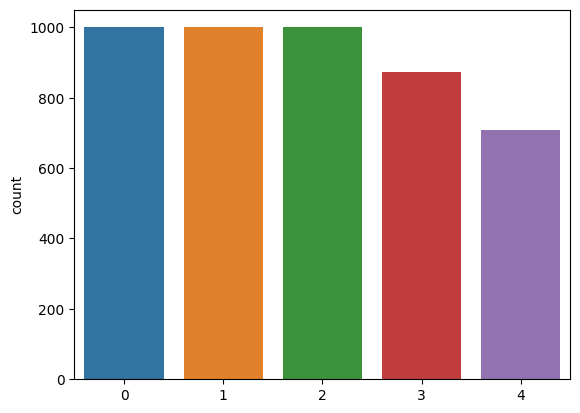

In [16]:
sns.countplot(x=filtered_labels)

In [17]:
def preprocess_image(img):
    # Extract green channel
    green_channel_img = img[:,:,1]
    
    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = exposure.equalize_adapthist(green_channel_img)
    
    # Apply median filter
    median_filtered_img = median(clahe)
    
    return median_filtered_img

In [18]:
images_preprocessed=np.array([preprocess_image(img) for img in filtered_images])

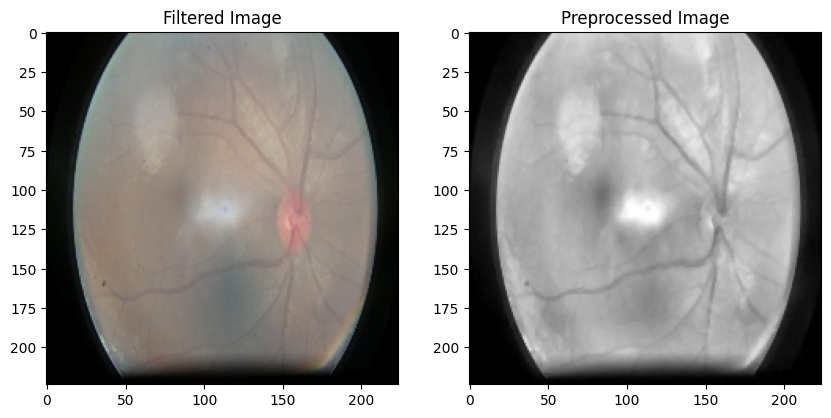

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(images_preprocessed[0],cmap='gray')
plt.title('Preprocessed Image')
plt.subplot(1, 2, 1)
plt.imshow(filtered_images[0], cmap='gray')
plt.title('Filtered Image')
plt.show()

In [20]:
standardized_images=images_preprocessed/255

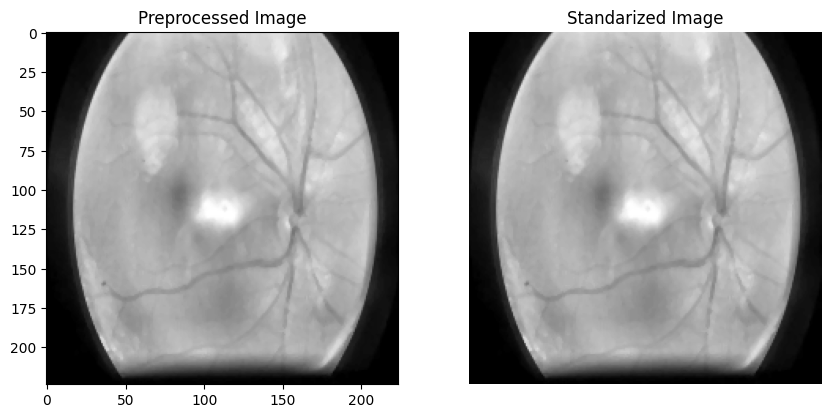

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images_preprocessed[0],cmap='gray')  
plt.title('Preprocessed Image')
plt.subplot(1, 2, 2)
plt.imshow(standardized_images[0], cmap='gray')
plt.title('Standarized Image')
plt.axis('off')

plt.show()